In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import random
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.tokenize import TreebankWordTokenizer
from collections import defaultdict
import nltk
import string
import re
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from torch.optim.lr_scheduler import StepLR
%matplotlib inline

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#pip install tensorflow==2.4.0

In [3]:
train_orig = pd.read_csv('Corona_NLP_train.csv', encoding = 'latin1')
test_orig = pd.read_csv('Corona_NLP_test.csv',encoding = 'latin1')

# Preprocess start here!

In [4]:
train_orig=train_orig[['OriginalTweet','Sentiment']]
test_orig=test_orig[['OriginalTweet','Sentiment']]

In [5]:
#pd.isnull(train_orig).sum()
#pd.isnull(test_orig).sum()

In [6]:
train_orig = train_orig.dropna()
test_orig = test_orig.dropna()

In [7]:
def remove_urls(input_text):
    input_text=str(input_text)
    result=re.sub(r'http.?://[^\s]+[\s]?', '', input_text)
    return result

def remove_nonASCII(string_):
    printable = set(string.printable)
    punctuation = set(string.punctuation)
    #res=''.join(filter(lambda x: x not in printable, string_))
    r = ''.join([c for c in string_ if (c in printable and c not in punctuation)])
    return r

def remove_speChar(string):
    if '\r' in string:
        string=string.replace('\r', ' ')
    if  '\n' in string:
        string=string.replace('\n', ' ')
    return string

def remove_stopwowrds(string):
  r = ' '.join([c for c in string.split() if c not in stop_words])
  return r

In [8]:
train_orig['NewTweet']=train_orig.apply(lambda row: remove_urls(row['OriginalTweet']), axis=1)
test_orig['NewTweet']=test_orig.apply(lambda row: remove_urls(row['OriginalTweet']), axis=1)

In [9]:
train_orig.head(10)

,OriginalTweet,Sentiment,NewTweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,@MeNyrbie @Phil_Gahan @Chrisitv and and
1,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...
3,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"Me, ready to go at supermarket during the #COV..."
5,As news of the regionÂs first confirmed COVID...,Positive,As news of the regionÂs first confirmed COVID...
6,Cashier at grocery store was sharing his insig...,Positive,Cashier at grocery store was sharing his insig...
7,Was at the supermarket today. Didn't buy toile...,Neutral,Was at the supermarket today. Didn't buy toile...
8,Due to COVID-19 our retail store and classroom...,Positive,Due to COVID-19 our retail store and classroom...
9,"For corona prevention,we should stop to buy th...",Negative,"For corona prevention,we should stop to buy th..."


In [10]:
train_orig['NewTweet']=train_orig.apply(lambda row: remove_nonASCII(row['NewTweet']), axis=1)
test_orig['NewTweet']=test_orig.apply(lambda row: remove_nonASCII(row['NewTweet']), axis=1)

In [11]:
train_orig.head()

,OriginalTweet,Sentiment,NewTweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,MeNyrbie PhilGahan Chrisitv and and
1,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elder...
3,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Me ready to go at supermarket during the COVID...


In [12]:
#train_orig['NewTweet']=train_orig.apply(lambda row: remove_stopwowrds(row['NewTweet']), axis=1)
#test_orig['NewTweet']=test_orig.apply(lambda row: remove_stopwowrds(row['NewTweet']), axis=1)

In [13]:
train_orig.head()

,OriginalTweet,Sentiment,NewTweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,MeNyrbie PhilGahan Chrisitv and and
1,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elder...
3,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Me ready to go at supermarket during the COVID...


In [14]:
train_orig['NewTweet'] = train_orig['NewTweet'].str.lower()
train_orig['NewTweet']=train_orig.apply(lambda row: remove_speChar(row['NewTweet']), axis=1)
train_ls=train_orig['NewTweet'].tolist()
train = train_orig

test_orig['NewTweet'] = test_orig['NewTweet'].str.lower()
test_orig['NewTweet']=test_orig.apply(lambda row: remove_speChar(row['NewTweet']), axis=1)
test_ls=test_orig['NewTweet'].tolist()
test = test_orig

# change 5 categories to 3; change "netural":0, "positive":1,"negative":2

In [15]:
train['Sentiment'].unique()
#change five categories to three 
train_df = train
test_df = test

In [16]:
def change_sen(sentiment):
    if sentiment == "Extremely Positive":
        return 'positive'
    elif sentiment == "Extremely Negative":
        return 'negative'
    elif sentiment == "Positive":
        return 'positive'
    elif sentiment == "Negative":
        return 'negative'
    else:
        return 'netural'

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


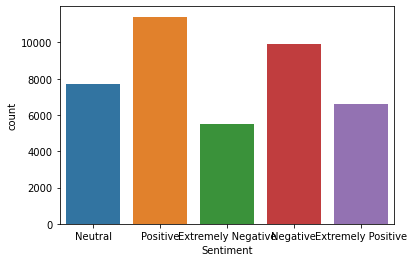

In [17]:
sns.countplot(train['Sentiment'])

In [18]:
train_df['Sentiment'] = train_df['Sentiment'].apply(lambda x: change_sen(x))
test_df['Sentiment'] = test_df['Sentiment'].apply(lambda x: change_sen(x))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


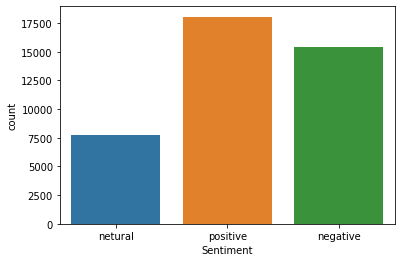

In [19]:
sns.countplot(train_df['Sentiment'])

In [20]:
label = {"netural":0, "positive":1,"negative":2}
train_df['Sentiment'] = train_df['Sentiment'].map(label)
test_df['Sentiment']  = test_df['Sentiment'].map(label)

# tokenization & word count & vocab_to_int

In [21]:
# count frequency of words in counts; 
#create word dict:word_to_int based on counts 
def word_dict(ls, type_):
    wordCount = defaultdict(int)
    punctuation = set(string.punctuation)
    tokenizer = TreebankWordTokenizer()
    for d in ls:
        #d = tokenizer.tokenize(d)
        #d = [token for token in d if token not in stop_words]
        for w in d.split():
          #if w not in stop_words:
            wordCount[w] += 1
    #count is counting the word frequency and sort from most frequent to least
    counts = [(wordCount[w], w) for w in wordCount]
    counts.sort()
    counts.reverse()
    words_list = [x[1] for x in counts]
    words = set(words_list)
    vocab_to_int={w:i+1 for i,(c,w) in enumerate(counts)}
    if type_ =='v':
        return vocab_to_int
    else:
        return counts

In [22]:
train_c = word_dict(train_df['NewTweet'], 'c')
train_vocab_to_int = word_dict(train_df['NewTweet'], 'v')

test_c = word_dict(test_df['NewTweet'], 'c')
test_vocab_to_int = word_dict(test_df['NewTweet'], 'v')

In [23]:
train_c[:10]

[(44785, 'the'),
 (38339, 'to'),
 (23976, 'and'),
 (21512, 'of'),
 (19325, 'a'),
 (19127, 'in'),
 (17995, 'coronavirus'),
 (16836, 'covid19'),
 (14041, 'for'),
 (12246, 'is')]

In [24]:
vocab_to_int_list = [(train_vocab_to_int[w], w) for w in train_vocab_to_int]
vocab_to_int_list[:10]

[(1, 'the'),
 (2, 'to'),
 (3, 'and'),
 (4, 'of'),
 (5, 'a'),
 (6, 'in'),
 (7, 'coronavirus'),
 (8, 'covid19'),
 (9, 'for'),
 (10, 'is')]

In [25]:
#tweet int: list contains list of sentence in which words convert to numerical values
def w_to_num(vocab_to_int,ls):
    tweet_int = []
    for review in ls:
        cur_ls=[]
        for word in review.split():
            if word not in vocab_to_int.keys():
                cur_ls.append(0)
            else:
                cur_ls.append(vocab_to_int[word])
        tweet_int.append(cur_ls)
    return tweet_int

In [26]:
train_int = w_to_num(train_vocab_to_int,train_ls)

test_int = w_to_num(train_vocab_to_int,test_ls)

In [27]:
train_int[:2]

[[39630, 35439, 15896, 3, 3],
 [516,
  907,
  2,
  33,
  2598,
  270,
  2,
  2958,
  902,
  1275,
  1130,
  455,
  397,
  21,
  902,
  1275,
  4,
  2598,
  1228,
  4122,
  3719,
  5095,
  499,
  42,
  51,
  48,
  2458,
  49,
  14229,
  3377,
  193,
  4,
  1080,
  3510,
  50,
  34,
  114,
  240]]

tweet_Int<- x_train; sentiment <- train_df[..]

In [28]:
'''
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df['NewTweet'])
vocab_length = len(tokenizer.word_index) + 1

x_train = tokenizer.texts_to_sequences(train_df['NewTweet'])
x_test = tokenizer.texts_to_sequences(test_df['NewTweet'])

x_train = pad_sequences(x_train, maxlen=60, padding='post')
x_test = pad_sequences(x_test, maxlen=60, padding='post')
'''

"\nfrom tensorflow.keras.preprocessing.text import Tokenizer\nfrom tensorflow.keras.preprocessing.sequence import pad_sequences\ntokenizer = Tokenizer()\ntokenizer.fit_on_texts(train_df['NewTweet'])\nvocab_length = len(tokenizer.word_index) + 1\n\nx_train = tokenizer.texts_to_sequences(train_df['NewTweet'])\nx_test = tokenizer.texts_to_sequences(test_df['NewTweet'])\n\nx_train = pad_sequences(x_train, maxlen=60, padding='post')\nx_test = pad_sequences(x_test, maxlen=60, padding='post')\n"

In [29]:

#test_df['NewTweet'][0]

In [30]:
'''
import keras
from keras.models import Sequential
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_length, 16, input_length=60),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True)),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
'''

'\nimport keras\nfrom keras.models import Sequential\nimport tensorflow as tf\nmodel = tf.keras.Sequential([\n    tf.keras.layers.Embedding(vocab_length, 16, input_length=60),\n    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True)),\n    tf.keras.layers.GlobalAveragePooling1D(),\n    tf.keras.layers.Dropout(0.3),\n    tf.keras.layers.Dense(64, activation=\'relu\'),\n    tf.keras.layers.Dropout(0.3),\n    tf.keras.layers.Dense(3, activation=\'softmax\')\n])\n\nmodel.compile(loss=\'categorical_crossentropy\',optimizer="adam",metrics=[\'accuracy\'])\n'

In [31]:
'''
from keras.utils import to_categorical

y_train = to_categorical(train_df['Sentiment'], 3)
y_test = to_categorical(test_df['Sentiment'], 3)
'''

"\nfrom keras.utils import to_categorical\n\ny_train = to_categorical(train_df['Sentiment'], 3)\ny_test = to_categorical(test_df['Sentiment'], 3)\n"

In [32]:
'''
num_epochs = 10
history = model.fit(x_train, y_train, epochs=num_epochs, 
                    validation_data=(x_test, y_test))
'''

'\nnum_epochs = 10\nhistory = model.fit(x_train, y_train, epochs=num_epochs, \n                    validation_data=(x_test, y_test))\n'

In [33]:
#print(model.summary())

## Plot Tweet length distribution

In [34]:
#accr = model.evaluate(X_test,y_test)
#print(accr)

In [35]:
def plot_tweet(ls,string):
    reviews_len = [len(x) for x in ls]
    pd.Series(reviews_len).hist()
    plt.title(string + ' tweet length distribution: word length in tweet VS frequency ')
    plt.xlabel('legnth of word in each tweet')
    plt.ylabel('frequeccy')
    plt.show()
    print(pd.Series(reviews_len).describe())

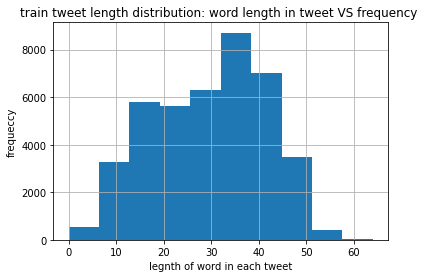

count    41157.000000
mean        29.613674
std         11.704519
min          0.000000
25%         20.000000
50%         31.000000
75%         39.000000
max         64.000000
dtype: float64


In [36]:
plot_tweet(train_int,'train')

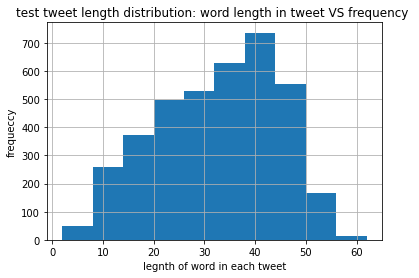

count    3798.000000
mean       32.086888
std        11.840029
min         2.000000
25%        23.000000
50%        33.000000
75%        42.000000
max        62.000000
dtype: float64


In [37]:
plot_tweet(test_int,'test')

# Padding / Truncating data

In [38]:
def pad_features(reviews_int, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length.
    '''
    features = np.zeros((len(reviews_int), seq_length), dtype = int)
    
    for i, review in enumerate(reviews_int):
        review_len = len(review)
        
        if review_len <= seq_length:
            zeroes = list(np.zeros(seq_length-review_len))
            new = review + zeroes
        elif review_len > seq_length:
            new = review[0:seq_length]
        
        features[i,:] = np.array(new)
    
    return features

In [39]:
#self define seq_length as 31(same as median, close to mean) 
THRESHOLD = 60
feature_train = pad_features(train_int,THRESHOLD)
#print(feature_ls)
feature_test = pad_features(test_int,THRESHOLD)
#we set the THRESHOLD so that all tweet length have the same length
#for tweet shorter than length set them to zero;
#for those longer: cut them to threshold

In [40]:
feature_train[0]

array([39630, 35439, 15896,     3,     3,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0])

In [41]:
#pd.DataFrame(feature_train).to_csv("x_train.csv")

In [42]:
#pd.DataFrame(feature_test).to_csv("x_test.csv")

# split train & validation

In [43]:
#x_test[0]

In [44]:
#X_test[0]

In [45]:
test_df['NewTweet'][0]

'trending new yorkers encounter empty supermarket shelves pictured wegmans in brooklyn soldout online grocers foodkick maxdelivery as coronavirusfearing shoppers stock up '

In [46]:
#split train and validation data (80,20)
X_train, X_val, y_train, y_val = train_test_split(feature_train, train_df['Sentiment'].to_numpy(), test_size=0.2, random_state=42)
X_test, y_test = feature_test, test_df['Sentiment'].to_numpy()


In [47]:
#vocab_size = len(train_vocab_to_int)+1

In [48]:
X_train[10]

array([    1,   407,   950,  1643,  6659,    17,   425,   596,     1,
        2854,  1390,     3,     1,   391,     6,    93,    16,    15,
          73,   612,    44,     1, 56741,   119,    96, 10996, 13089,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0])

In [49]:
'''
import keras
from keras.models import Sequential
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 16, input_length=60),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True)),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    #tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='softmax')
])
# opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
'''

'\nimport keras\nfrom keras.models import Sequential\nimport tensorflow as tf\nmodel = tf.keras.Sequential([\n    tf.keras.layers.Embedding(vocab_size, 16, input_length=60),\n    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True)),\n    tf.keras.layers.GlobalAveragePooling1D(),\n    tf.keras.layers.Dropout(0.3),\n    tf.keras.layers.Dense(64, activation=\'relu\'),\n    #tf.keras.layers.Dropout(0.3),\n    tf.keras.layers.Dense(3, activation=\'softmax\')\n])\n# opt = tf.keras.optimizers.Adam(learning_rate=0.01)\nmodel.compile(loss=\'categorical_crossentropy\',optimizer="adam",metrics=[\'accuracy\'])\n'

In [50]:
'''
from keras.utils import to_categorical
y = to_categorical(train_df['Sentiment'], 3)
#y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)
'''

"\nfrom keras.utils import to_categorical\ny = to_categorical(train_df['Sentiment'], 3)\n#y_train = to_categorical(y_train, 3)\ny_test = to_categorical(y_test, 3)\n"

In [51]:
'''
num_epochs = 10
history = model.fit(feature_train, y, epochs=num_epochs, validation_data=(X_test, y_test))
'''

'\nnum_epochs = 10\nhistory = model.fit(feature_train, y, epochs=num_epochs, validation_data=(X_test, y_test))\n'

In [52]:
#accr = model.evaluate(X_test,y_test)
#print(accr)

# data loader 

In [53]:
'''
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df['NewTweet'])
vocab_length = len(tokenizer.word_index) + 1

X_train = tokenizer.texts_to_sequences(train_df['NewTweet'])
X_test = tokenizer.texts_to_sequences(test_df['NewTweet'])

X_train = pad_sequences(X_train, maxlen=60, padding='post')
X_test = pad_sequences(X_test, maxlen=60, padding='post')

X_train, X_val, y_train, y_val = train_test_split(X_train, train_df['Sentiment'].to_numpy(), test_size=0.2, random_state=42)
y_test = test_df['Sentiment'].to_numpy()
'''

"\nfrom tensorflow.keras.preprocessing.text import Tokenizer\nfrom tensorflow.keras.preprocessing.sequence import pad_sequences\ntokenizer = Tokenizer()\ntokenizer.fit_on_texts(train_df['NewTweet'])\nvocab_length = len(tokenizer.word_index) + 1\n\nX_train = tokenizer.texts_to_sequences(train_df['NewTweet'])\nX_test = tokenizer.texts_to_sequences(test_df['NewTweet'])\n\nX_train = pad_sequences(X_train, maxlen=60, padding='post')\nX_test = pad_sequences(X_test, maxlen=60, padding='post')\n\nX_train, X_val, y_train, y_val = train_test_split(X_train, train_df['Sentiment'].to_numpy(), test_size=0.2, random_state=42)\ny_test = test_df['Sentiment'].to_numpy()\n"

In [54]:
#X_test.shape

In [55]:
from torch.utils.data import DataLoader, TensorDataset
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(X_train).cuda(), torch.from_numpy(y_train).cuda())
valid_data = TensorDataset(torch.from_numpy(X_val).cuda(), torch.from_numpy(y_val).cuda())
test_data = TensorDataset(torch.from_numpy(X_test).cuda(), torch.from_numpy(y_test).cuda())

#PARAMETER TODO
batch_size = 64 

# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, drop_last=True)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size, drop_last=True)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size, drop_last=True)

In [56]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([64, 60])
Sample input: 
 tensor([[1560, 3430,  526,  ...,    0,    0,    0],
        [   8,   97, 1824,  ...,    0,    0,    0],
        [  67,   91, 5707,  ...,    0,    0,    0],
        ...,
        [   1,   45, 1630,  ...,    0,    0,    0],
        [  65,   70, 1512,  ...,    0,    0,    0],
        [3948,  233, 1772,  ...,    0,    0,    0]], device='cuda:0')

Sample label size:  torch.Size([64])
Sample label: 
 tensor([0, 2, 1, 1, 1, 0, 2, 1, 0, 2, 1, 2, 0, 2, 1, 0, 2, 1, 0, 0, 1, 1, 2, 0,
        1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 0, 2,
        2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 0, 0, 2, 1, 1, 1], device='cuda:0')


# The layers are as follows:
0. Tokenize : This is not a layer for LSTM network but a mandatory step of converting our words into tokens (integers)  

Embedding Layer: that converts our word tokens (integers) into embedding of specific size  

LSTM Layer: defined by hidden state dims and number of layers  

Fully Connected Layer: that maps output of LSTM layer to a desired output size  

Sigmoid Activation Layer: that turns all output values in a value between 0 and 1  

Output: Sigmoid output from the last timestep is considered as the final output of this network  


# define the model class

In [57]:
import torch.nn as nn

class SentimentLSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.3):
        """
        Initialize the model by setting up the layers.
        """
        super().__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True, bidirectional=True)
        #self.gru = nn.GRU(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True, bidirectional=True)
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        # linear and sigmoid layers
        #self.maxpool = nn.AdaptiveMaxPool1d(128)
        self.fc1 = nn.Linear(256, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, output_size)
        #self.sig = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        #print('inside nn')
        #print(f'x size: {x.shape}')

        batch_size = x.size(0)
        #print(f'batch_size: {batch_size}')
        x = x.long()
        # embeddings and lstm_out
        if(x.is_cuda==False):
            x=x.cuda()
        embeds = self.embedding(x)
        #print(f'embeds shape: {embeds.shape}')

        #lstm_out, hidden = self.gru(embeds, hidden)
        lstm_out, hidden = self.lstm(embeds, hidden)
        #print(f'lstm_out shape: {lstm_out.shape}')
        lstm_out = torch.mean(lstm_out, dim=1)
        #print(f'lstm_out shape: {lstm_out.shape}')
        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        #print(f'lstm_out shape second: {lstm_out.shape}')
        #out = self.maxpool(lstm_out)
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc1(out)
        out = self.relu(out)
        #out = self.dropout(out)
        out = self.fc2(out)
        
        #print(f'fc output shape: {out.shape}')
        # sigmoid function
        #sig_out = self.sig(out)
        #sig_out = self.relu(out)
        sig_out = self.softmax(out)
        
        # reshape to be batch_size first
        #sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out.view(batch_size, -1, output_size)

        #print(f'sig_out shape: {sig_out.shape}')
        sig_out = sig_out[:, -1] # get last batch of labels
        #sig_out = torch.mean(sig_out, dim=1)
        #sig_out = sig_out[:, -1, :]
        #print(f'sig_out shape: {sig_out.shape}')
        # return last sigmoid output and hidden state
        #print('leave nn')
        #print(f'final shape: {sig_out.shape}')
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers*2, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers*2, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

# Train the network

## Instantiate the network

In [58]:
# Instantiate the model w/ hyperparams
vocab_size = len(train_vocab_to_int)+1 # +1 for the 0 padding
output_size = 3 
embedding_dim = 16
hidden_dim = 256
n_layers = 2
net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(net)

SentimentLSTM(
  (embedding): Embedding(60889, 16)
  (lstm): LSTM(16, 256, num_layers=2, batch_first=True, dropout=0.3, bidirectional=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=256, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=3, bias=True)
  (softmax): Softmax(dim=1)
)


# Train loop

In [59]:
# loss and optimization functions
lr=0.001

#criterion = nn.BCELoss()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)
#scheduler = StepLR(optimizer, step_size=10, gamma=0.1)

train_on_gpu = torch.cuda.is_available()


# training params

epochs = 50 # 3-4 is approx where I noticed the validation loss stop decreasing

counter = 0
print_every = 100
clip=5 # gradient clipping

# move model to GPU, if available
if(train_on_gpu):
    net.cuda()

net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
#         inputs = inputs.type(torch.LongTensor)
        output, h = net(inputs, h)

        # calculate the loss and perform backprop
        #print(output.squeeze())
        #print(labels.float().shape)
        labels_long = labels.type(torch.LongTensor).cuda()
        #loss = criterion(output.squeeze(), labels.float())
        loss = criterion(output.squeeze(), labels_long)
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        #nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:
                if inputs.device=='cpu':
                    print("valid")
                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                if(train_on_gpu):
                    inputs, labels = inputs.cuda(), labels.type(torch.LongTensor).cuda()

                inputs = inputs.type(torch.LongTensor)
                #labels = labels.type(torch.LongTensor)
                output, val_h = net(inputs, val_h)
#                 print(val_h)
                #val_loss = criterion(output.squeeze(), labels.float())
                val_loss = criterion(output.squeeze(), labels)

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))
    #scheduler.step()

Epoch: 1/50... Step: 100... Loss: 1.080938... Val Loss: 1.049574
Epoch: 1/50... Step: 200... Loss: 1.051161... Val Loss: 1.048921
Epoch: 1/50... Step: 300... Loss: 1.034920... Val Loss: 1.040418
Epoch: 1/50... Step: 400... Loss: 1.058215... Val Loss: 1.034211
Epoch: 1/50... Step: 500... Loss: 1.013101... Val Loss: 1.038827
Epoch: 2/50... Step: 600... Loss: 1.043200... Val Loss: 1.034485
Epoch: 2/50... Step: 700... Loss: 1.008132... Val Loss: 1.032272
Epoch: 2/50... Step: 800... Loss: 0.995717... Val Loss: 1.033715
Epoch: 2/50... Step: 900... Loss: 1.004509... Val Loss: 1.028787
Epoch: 2/50... Step: 1000... Loss: 1.027104... Val Loss: 1.021171
Epoch: 3/50... Step: 1100... Loss: 0.941970... Val Loss: 1.013619
Epoch: 3/50... Step: 1200... Loss: 1.025471... Val Loss: 1.011045
Epoch: 3/50... Step: 1300... Loss: 0.968650... Val Loss: 0.984007
Epoch: 3/50... Step: 1400... Loss: 1.101957... Val Loss: 0.966977
Epoch: 3/50... Step: 1500... Loss: 0.886722... Val Loss: 0.935833
Epoch: 4/50... Step

# TEST

In [60]:

# Get test data loss and accuracy

test_losses = [] # track loss
num_correct = 0

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in test_loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = tuple([each.data for each in h])

    if(train_on_gpu):
        inputs, labels = inputs.cuda().type(torch.LongTensor), labels.type(torch.LongTensor).cuda()
    
    # get predicted outputs
    #inputs = inputs.type(torch.LongTensor)
    output, h = net(inputs, h)
    
    # calculate loss
    test_loss = criterion(output.squeeze(), labels)
    test_losses.append(test_loss.item())
    #print(output)
    #print(output.squeeze())
    # convert output probabilities to predicted class (0 or 1)
    #pred = torch.round(output.squeeze())  # rounds to the nearest integer
    #pred = torch.max(output.squeeze(), 1)[1]
    pred = torch.argmax(output,dim=1, keepdim=True)
    #print(pred)
    # compare predictions to true label
    correct_tensor = pred.eq(labels.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)


# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

Test loss: 0.786
Test accuracy: 0.758


In [79]:
h = net.init_hidden(batch_size)
prediction = []
test_labels = []
for inputs, labels in test_loader:
  h = tuple([each.data for each in h])
  inputs, labels = inputs.cuda().type(torch.LongTensor), labels.cuda().type(torch.LongTensor)
  output, h = net(inputs, h)
  pred = torch.argmax(output, dim=1, keepdim=True)
  prediction.append(pred.tolist())
  test_labels.append(labels.tolist())
prediction = np.array(prediction).reshape(-1,)
test_labels = np.array(test_labels).reshape(-1,)

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(prediction, test_labels)

0.7635063559322034

In [82]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, prediction))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67       617
           1       0.78      0.78      0.78      1531
           2       0.79      0.78      0.78      1628

    accuracy                           0.76      3776
   macro avg       0.74      0.75      0.74      3776
weighted avg       0.76      0.76      0.76      3776



In [75]:
a

array([1, 1, 1, ..., 0, 1, 2])